# **Predicting Compressive Strength of Concrete**
## *Featurization, Model Selection and Tuning*

### In this project, we will be using multiple regression models to predict the concrete compressive strength. 

From: https://archive.ics.uci.edu/ml/datasets/Concrete+Compressive+Strength

Concrete Compressive Strength

Data Type: multivariate

Abstract: Concrete is the most important material in civil engineering. The
concrete compressive strength is a highly nonlinear function of age and
ingredients. These ingredients include cement, blast furnace slag, fly ash,
water, superplasticizer, coarse aggregate, and fine aggregate.

Sources:

Original Owner and Donor
Prof. I-Cheng Yeh
Department of Information Management
Chung-Hua University,
Hsin Chu, Taiwan 30067, R.O.C.
e-mail:icyeh@chu.edu.tw
TEL:886-3-5186511

Date Donated: August 3, 2007

Data Characteristics:

The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled).

Summary Statistics:

Number of instances (observations): 1030
Number of Attributes: 9
Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
Missing Attribute Values: None

Variable Information:

Given is the variable name, variable type, the measurement unit and a brief description.
The concrete compressive strength is the regression problem. The order of this listing
corresponds to the order of numerals along the rows of the database.

Name -- Data Type -- Measurement -- Description

Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
Age -- quantitative -- Day (1~365) -- Input Variable
Concrete compressive strength -- quantitative -- MPa -- Output Variable

Past Usage:

Main

    I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial
    neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998).

Others

    I-Cheng Yeh, "Modeling Concrete Strength with Augment-Neuron Networks," J. of
    Materials in Civil Engineering, ASCE, Vol. 10, No. 4, pp. 263-268 (1998).

    I-Cheng Yeh, "Design of High Performance Concrete Mixture Using Neural Networks,"
    J. of Computing in Civil Engineering, ASCE, Vol. 13, No. 1, pp. 36-42 (1999).

    I-Cheng Yeh, "Prediction of Strength of Fly Ash and Slag Concrete By The Use of
    Artificial Neural Networks," Journal of the Chinese Institute of Civil and Hydraulic
    Engineering, Vol. 15, No. 4, pp. 659-663 (2003).

    I-Cheng Yeh, "A mix Proportioning Methodology for Fly Ash and Slag Concrete Using
    Artificial Neural Networks," Chung Hua Journal of Science and Engineering, Vol. 1, No.
    1, pp. 77-84 (2003).

    Yeh, I-Cheng, "Analysis of strength of concrete using design of experiments and
    neural networks,": Journal of Materials in Civil Engineering, ASCE, Vol.18, No.4,
    pp.597-604 ?2006?.

Acknowledgements, Copyright Information, and Availability:

NOTE: Reuse of this database is unlimited with retention of copyright notice for
Prof. I-Cheng Yeh and the following published paper:

I-Cheng Yeh, "Modeling of strength of high performance concrete using artificial
neural networks," Cement and Concrete Research, Vol. 28, No. 12, pp. 1797-1808 (1998)

## Importing the main libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

In [2]:
df = pd.read_csv('compresive_strength_concrete+2.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

* ### No missing values in our dataset.
* ### There are eight independent variables.
* ### Data types are in the correct numeric format.

## Renaming the columns for ease of access/use.

In [4]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


# *Exploratory Data Analysis*

## Creating a function to calculate Quartiles, Interquartile Range, and Outliers

In [6]:
def quartiles(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{'='*35}\n{'-'*15}{col}{'-'*15}")
    print(f"1st Quartile({col}): {np.round(Q1,2)}")
    print(f"3rd Quartile({col}): {np.round(Q3,2)}")
    print(f"Interquartile Range({col}): {np.round(IQR,2)}")
    l_outliers = Q1 - 1.5 * IQR
    r_outliers = Q3 + 1.5 * IQR
    print(f"Lower Outliers Limit ({col}): {np.round(l_outliers,2)}")
    print(f"Upper Outliers Limit ({col}): {np.round(r_outliers,2)}\n")
    print(f"Number of Outliers in {col}(Upper): {df[df[col] > r_outliers][col].count()}")
    print(f"Number of Outliers in {col}(Lower): {df[df[col] < l_outliers][col].count()}")
    print(f"% of Outliers in {col}(Upper): {np.round(df[df[col] > r_outliers][col].count()*100/len(df), 2)}%")
    print(f"% of Outliers in {col}(Lower): {np.round(df[df[col] < l_outliers][col].count()*100/len(df), 2)}%\n{'='*35}\n")

In [7]:
for column in df.columns:
    quartiles(column)

---------------cement---------------
1st Quartile(cement): 192.38
3rd Quartile(cement): 350.0
Interquartile Range(cement): 157.62
Lower Outliers Limit (cement): -44.06
Upper Outliers Limit (cement): 586.44

Number of Outliers in cement(Upper): 0
Number of Outliers in cement(Lower): 0
% of Outliers in cement(Upper): 0.0%
% of Outliers in cement(Lower): 0.0%

---------------slag---------------
1st Quartile(slag): 0.0
3rd Quartile(slag): 142.95
Interquartile Range(slag): 142.95
Lower Outliers Limit (slag): -214.42
Upper Outliers Limit (slag): 357.38

Number of Outliers in slag(Upper): 2
Number of Outliers in slag(Lower): 0
% of Outliers in slag(Upper): 0.19%
% of Outliers in slag(Lower): 0.0%

---------------ash---------------
1st Quartile(ash): 0.0
3rd Quartile(ash): 118.3
Interquartile Range(ash): 118.3
Lower Outliers Limit (ash): -177.45
Upper Outliers Limit (ash): 295.75

Number of Outliers in ash(Upper): 0
Number of Outliers in ash(Lower): 0
% of Outliers in ash(Upper): 0.0%
% of Out

## Creating Boxplots for Each Attribute

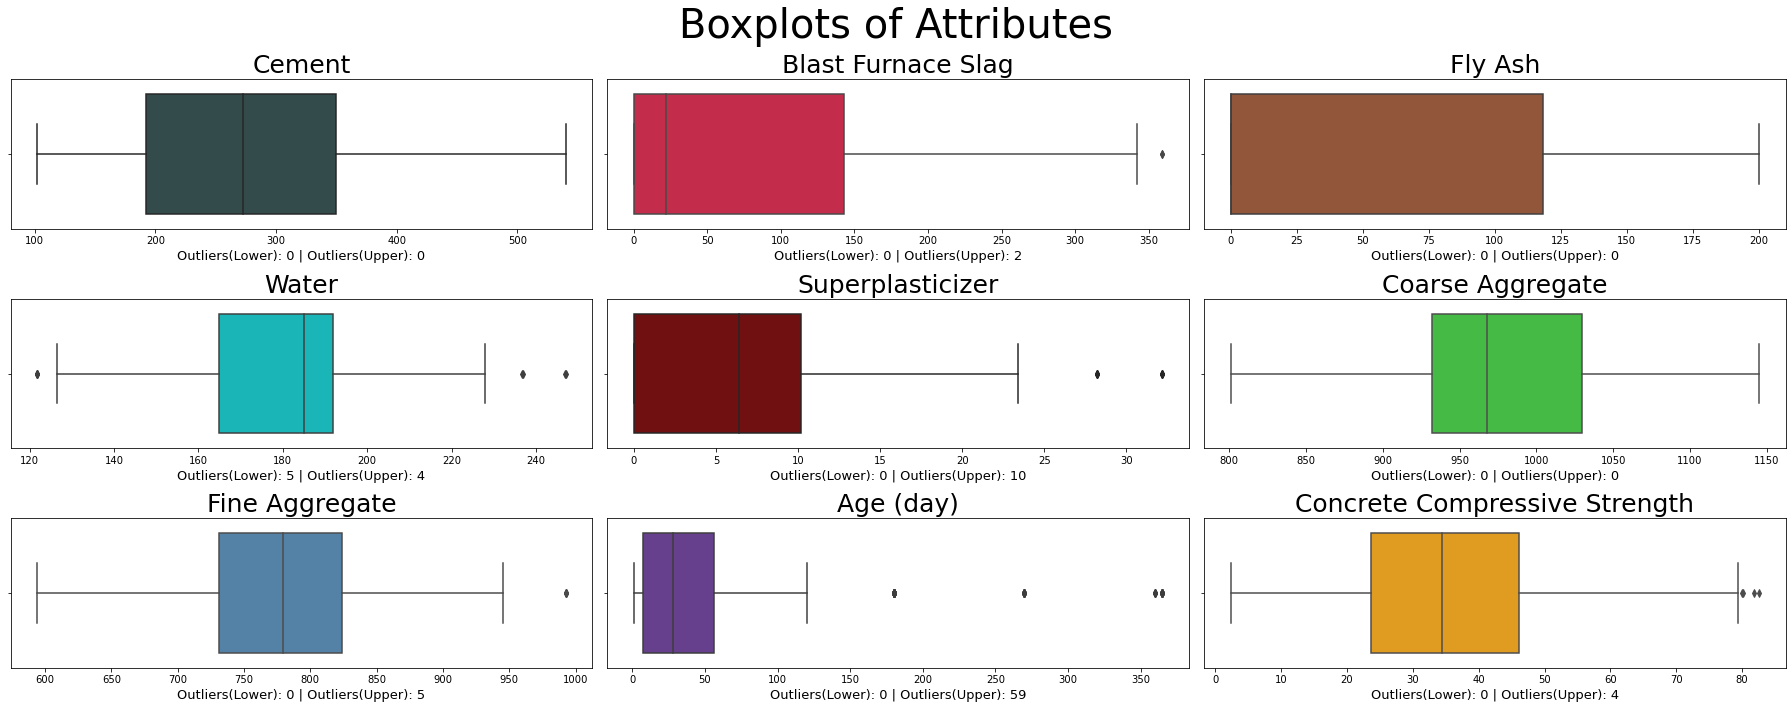

In [8]:
import matplotlib.colors as colors
columns = df.columns
color = ['darkslategrey','crimson','sienna','darkturquoise','maroon','limegreen','steelblue','rebeccapurple','orange']
titles = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age (day)', 'Concrete Compressive Strength']
counter = 0
fig, ax = plt.subplots(3,3, figsize=(25,10))

for x in range(3):
    for y in range(3):
        q1 = df[columns[counter]].quantile(0.25)
        q3 = df[columns[counter]].quantile(0.75)
        iqr = q3 - q1
        l_out = df[df[columns[counter]] < q1 - 1.5 * iqr][columns[counter]].count()
        r_out = df[df[columns[counter]] > q3 + 1.5 * iqr][columns[counter]].count()
        
        sns.boxplot(data=df, x=columns[counter], ax=ax[x,y], color=color[counter])
        ax[x,y].set_title(titles[counter], fontsize=25)
        ax[x,y].set_xlabel(f"Outliers(Lower): {l_out} | Outliers(Upper): {r_out}", fontsize=13)
        counter += 1
        
fig.suptitle('Boxplots of Attributes', fontsize=40)
fig.tight_layout()
plt.show()

## Replacing Outliers With Their Respective Attribute Medians

In [9]:
def replace_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df.loc[(df[col] < low) | (df[col] > high), col] = df[col].median()

In [10]:
for column in df.columns[:-1]:
    replace_outliers(column)
    

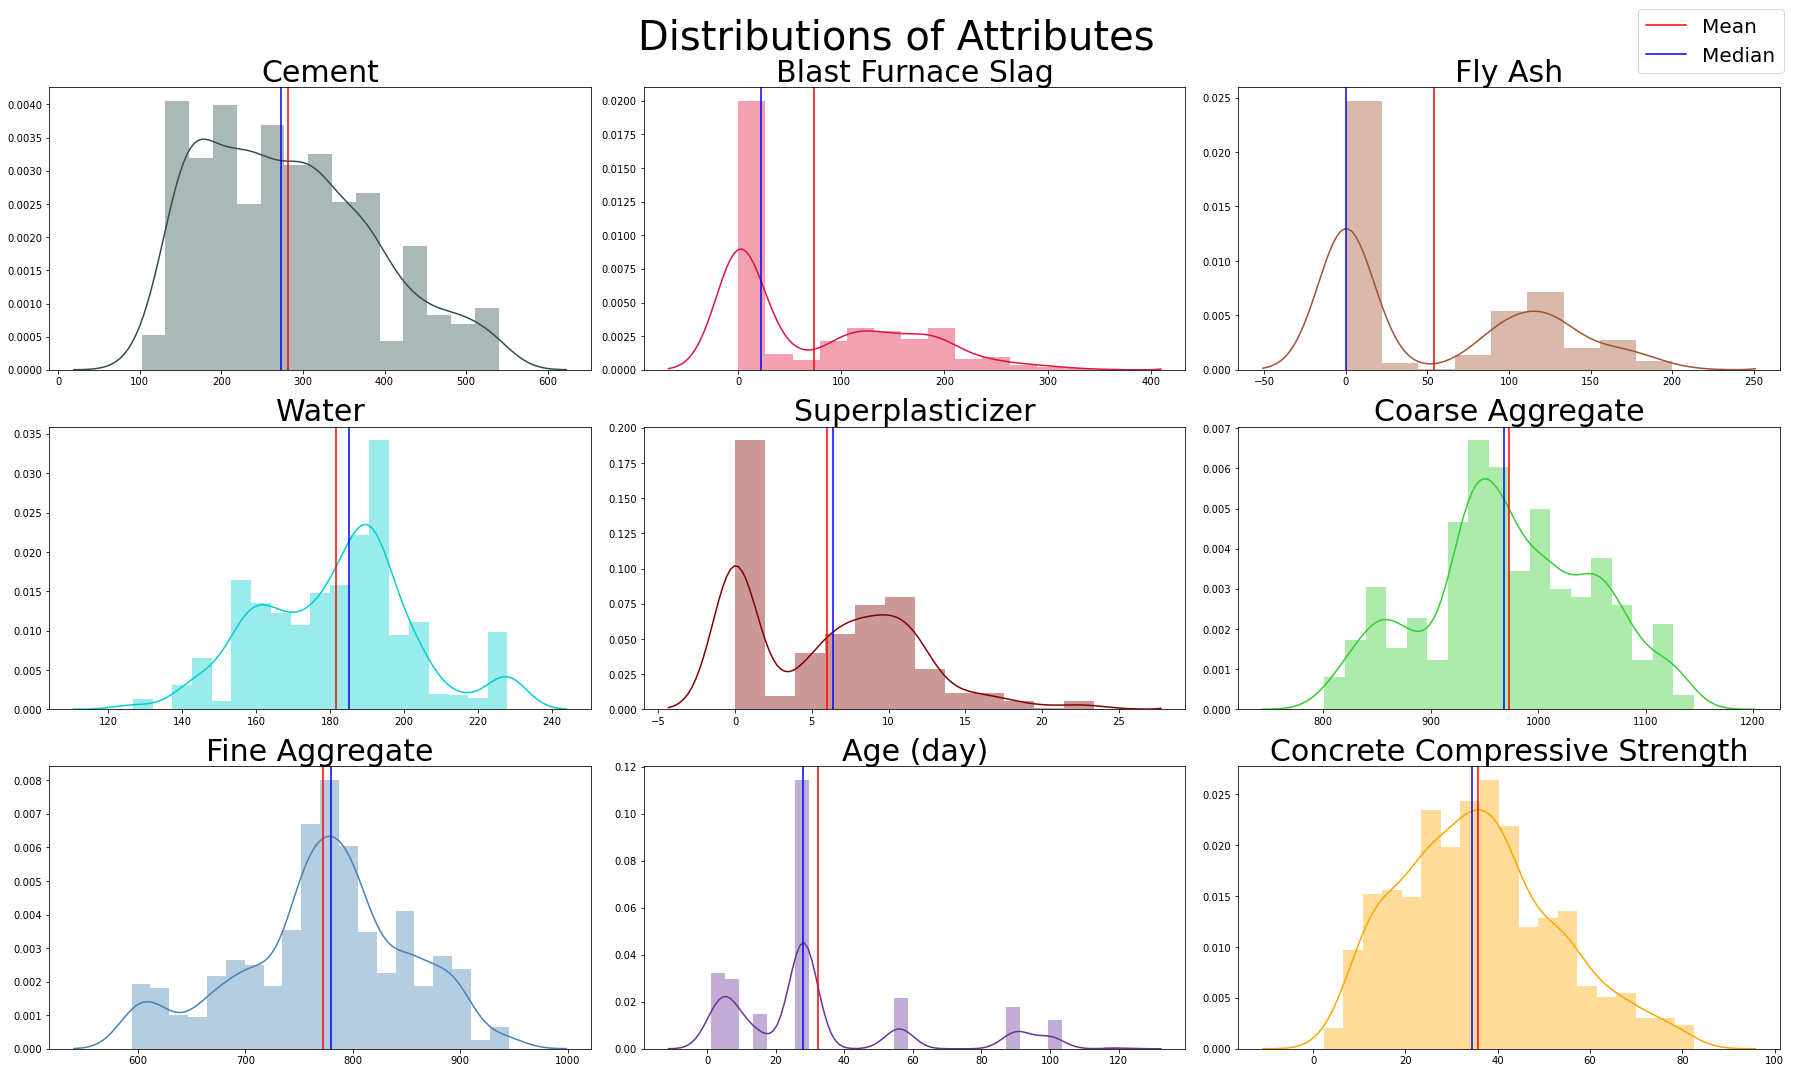

In [11]:
counter = 0
fig, ax = plt.subplots(3,3, figsize=(25,15))
for x in range(3):
    for y in range(3):
        sns.distplot(df[columns[counter]], ax=ax[x,y],color=color[counter])
        ax[x,y].set_title(titles[counter], fontsize=30)
        ax[x,y].set_xlabel('')
        ax[x,y].axvline(df[columns[counter]].mean(), color='red', label='Mean')
        ax[x,y].axvline(df[columns[counter]].median(), color='blue', label='Median')
        counter += 1
fig.suptitle('Distributions of Attributes', fontsize=40)
fig.tight_layout()
fig.legend(['Mean', 'Median'], fontsize=20)
plt.show()

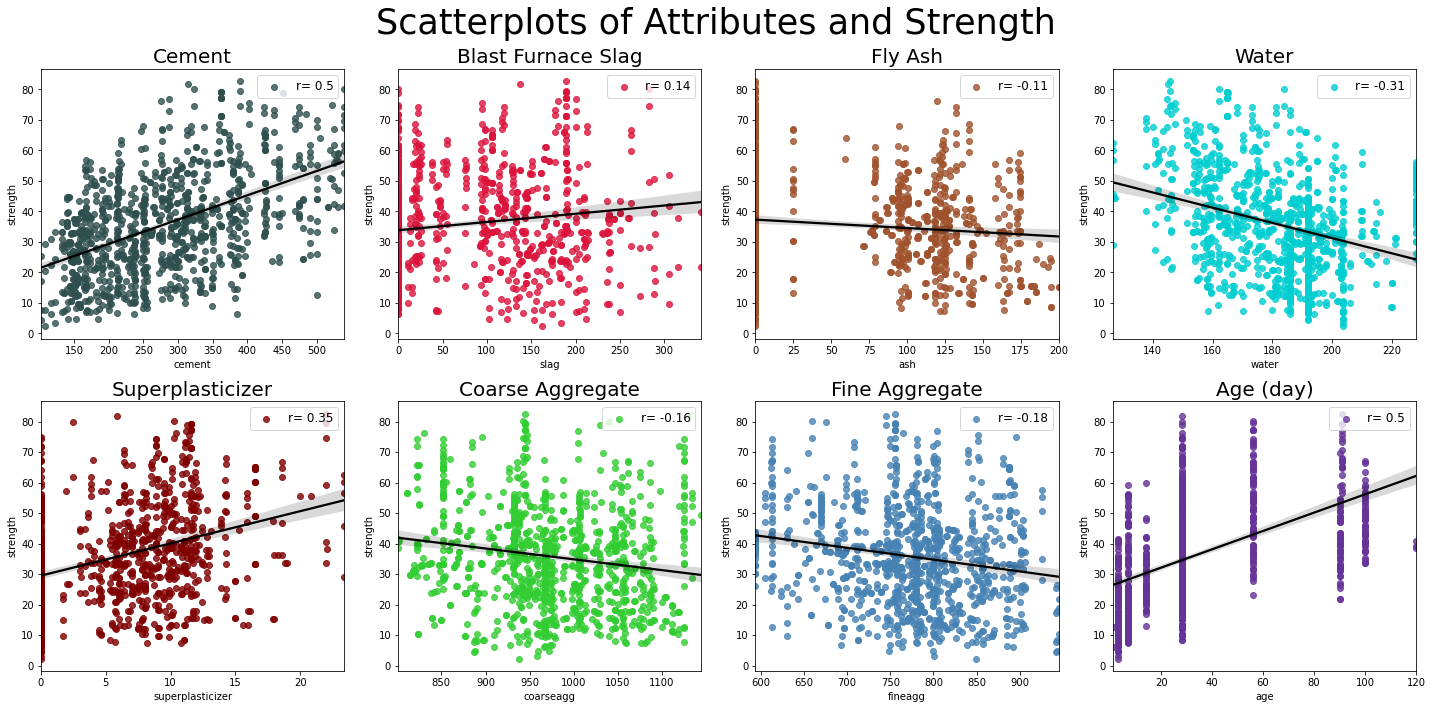

In [12]:
counter = 0
fig, ax = plt.subplots(2,4, figsize=(20,10))
for x in range(2):
    for y in range(4):
        corr = np.round(df[columns[counter]].corr(df['strength']),2)
        sns.regplot(data=df, x=columns[counter], y='strength', ax=ax[x,y], color=color[counter], line_kws={'color': 'black'}, label=f"r= {corr}")
        ax[x,y].set_title(f"{titles[counter]}", fontsize=20)
        ax[x,y].legend(fontsize=12, loc='upper right')
        counter +=1
fig.suptitle('Scatterplots of Attributes and Strength', fontsize=35)      
plt.tight_layout()
plt.show()

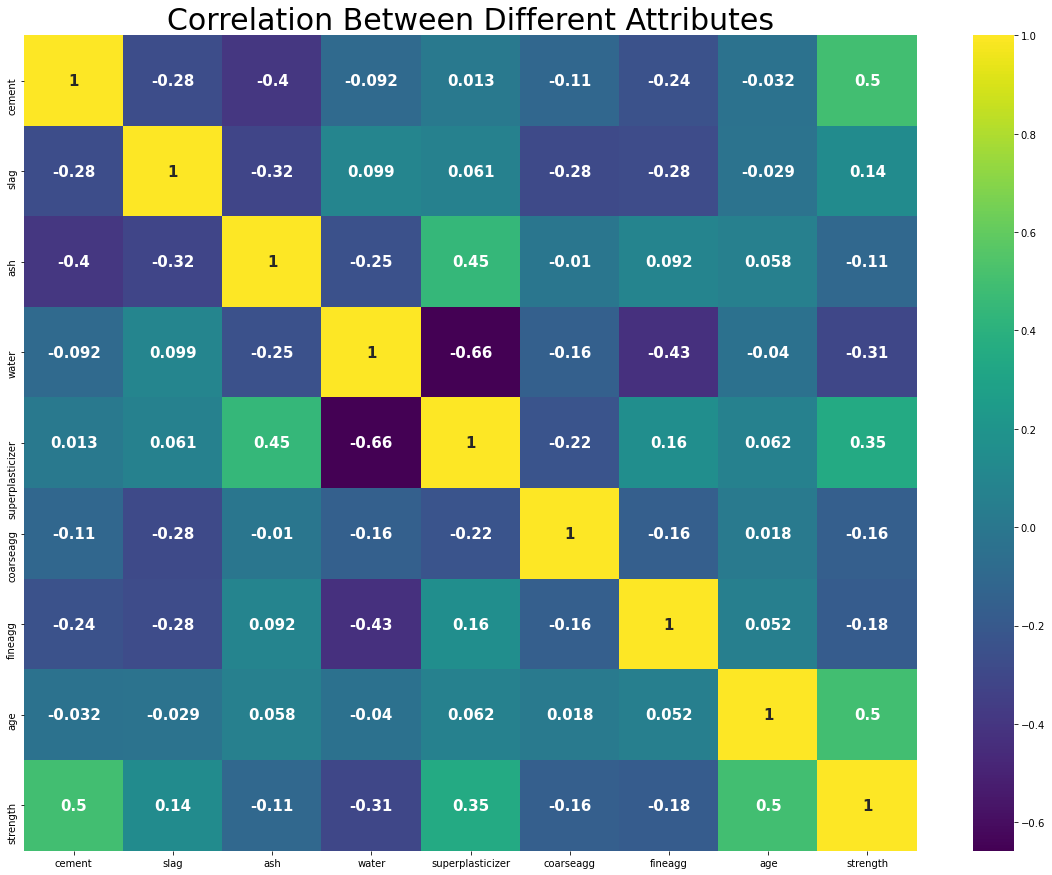

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='viridis', annot_kws={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Correlation Between Different Attributes', fontsize=30)
plt.show()

# Feature Engineering and Model Building

In [14]:
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,28,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,28,44.30


## Splitting the data into independent and dependent attributes

In [15]:
X = df.drop('strength', axis=1)
y = df['strength']

## Splitting the data into train and test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Standardizing the train and test data

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

## Concatenating the separately scaled train and test sets for cross validation later

In [18]:
X = pd.concat([X_train, X_test], ignore_index=True) # Combining the separately scaled X_train and X_test for kfold validation later.
y = pd.concat([y_train, y_test], ignore_index=True)

# ***Building Different Models***

# Model 1: Random Forest Regressor

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

## Defining a function to print out the results of the algorithm

In [20]:
def print_accuracy(model, pred, return_var=False):
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae = mean_absolute_error(y_test, pred)
    msle = mean_squared_log_error(y_test, pred)
    rmsle = np.sqrt(mean_squared_log_error(y_test, pred))
    
    print(f"Accuracy Score(Training): {train_accuracy}")
    print(f"Accuracy Score(Testing): {test_accuracy}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Log Error: {msle}")
    print(f"Root Mean Squared Log Error: {rmsle}")
    
    if return_var == True:
        return train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle

## Model Results

In [21]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(rfr, rfr_pred, True)

Accuracy Score(Training): 0.9816363816458348
Accuracy Score(Testing): 0.8755854566452319
Mean Squared Error: 32.6099474752515
Root Mean Squared Error: 5.710512015156916
Mean Absolute Error: 4.035076883957465
Mean Squared Log Error: 0.02904142430594043
Root Mean Squared Log Error: 0.17041544620702792


# KFold Cross Validation

In [22]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=20, random_state=1, shuffle=True)
k_results = cross_val_score(rfr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.88234821 0.92648144 0.93906362 0.88310003 0.92871635 0.77826359
 0.78119745 0.93528306 0.94588208 0.95623347 0.94322723 0.8959179
 0.91314186 0.86206248 0.88213047 0.9069379  0.95342479 0.95175109
 0.9535261  0.91233309]
KFold Mean Accuracy: 0.9065511097486917


## Storing the accuracy results for each model in a DataFrame for final comparison

In [23]:
results = pd.DataFrame({'Algorithm': 'Random Forest Regressor',
                        'Accuracy(Train)': train_accuracy,
                        'Accuracy(Test)' : test_accuracy,
                        'KFold(Mean)': k_mean,
                        'MSE': mse,
                        'RMSE': rmse,
                        'MAE': mae,
                        'MSLE': msle,
                        'RMSLE': rmsle},
                        index=[1])
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415


## Creating a function to update the results DataFrame with each subsequent algorithm

In [24]:
def update_results(algorithm, train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle):
    updated = pd.concat([results, pd.DataFrame({'Algorithm': algorithm,
                                                    'Accuracy(Train)': train_accuracy,
                                                'Accuracy(Test)' : test_accuracy,
                                                    'KFold(Mean)': k_mean,
                                                    'MSE': mse,
                                                    'RMSE': rmse,
                                                    'MAE': mae,
                                                    'MSLE': msle,
                                                    'RMSLE': rmsle},
                                               index=[results.index[-1]+1])])
    return updated

# Model 2: Gradient Boosting Regressor

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

## Model Results

In [26]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(gbr, gbr_pred, True)

Accuracy Score(Training): 0.9477368610390589
Accuracy Score(Testing): 0.8805147950881755
Mean Squared Error: 31.317932382982384
Root Mean Squared Error: 5.596242702294315
Mean Absolute Error: 4.201693929636786
Mean Squared Log Error: 0.030482339218871064
Root Mean Squared Log Error: 0.174591921974847


## KFold Cross Validation

In [27]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(gbr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.87463299 0.90968394 0.92790198 0.85429613 0.87713672 0.83268747
 0.82001695 0.88264283 0.95694153 0.94202353 0.91932028 0.88791863
 0.88852984 0.88060153 0.85603713 0.87370538 0.94073108 0.92876409
 0.95470266 0.89973313]
KFold Mean Accuracy: 0.8954003918087554


## Updating the results DataFrame

In [28]:
results = update_results('Gradient Boosting Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592


# Model 3: AdaBoost Regressor

In [29]:
from sklearn.ensemble import AdaBoostRegressor
abr = AdaBoostRegressor()
abr.fit(X_train, y_train)
abr_pred = abr.predict(X_test)

In [30]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(abr, abr_pred, True)

Accuracy Score(Training): 0.820873068121673
Accuracy Score(Testing): 0.7574771770721961
Mean Squared Error: 63.56697781443341
Root Mean Squared Error: 7.97289017950413
Mean Absolute Error: 6.574284760438311
Mean Squared Log Error: 0.07399144374204619
Root Mean Squared Log Error: 0.2720136830051867


## KFold Cross Validation

In [31]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(abr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.75495625 0.72118668 0.80285469 0.73573275 0.76176884 0.72205051
 0.72604829 0.80022505 0.83905595 0.81720864 0.79747761 0.77791923
 0.76299866 0.74405788 0.70193524 0.77473927 0.85580472 0.81575258
 0.81994688 0.74465226]
KFold Mean Accuracy: 0.7738185992566262


## Updating the results DataFrame

In [32]:
results = update_results('AdaBoost Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014


# Model 4: KNN Regressor

## Using a loop to find the best k value for the model

In [33]:
from sklearn.neighbors import KNeighborsRegressor
mse = []
for i in range(1, 45):
    knr = KNeighborsRegressor(n_neighbors=i)
    knr.fit(X_train, y_train)
    knr_pred = knr.predict(X_test)
    mse.append(mean_squared_error(y_test, knr_pred))

## Visualizing the results (Mean Squared Error)

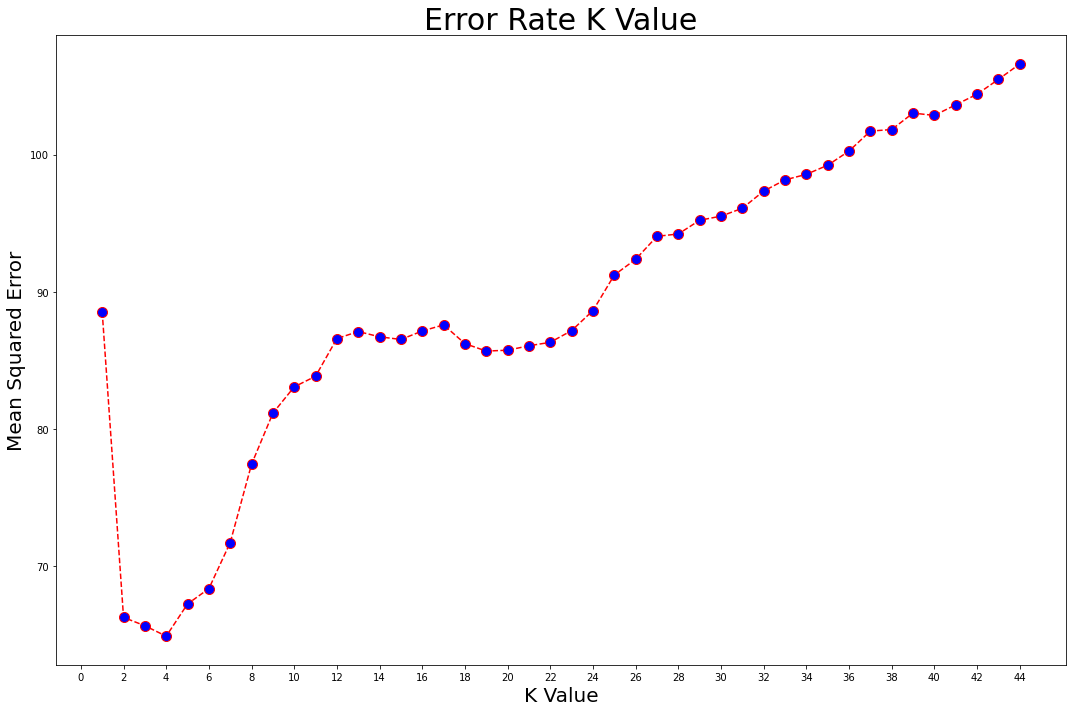

In [34]:
plt.figure(figsize=(15, 10))  
plt.plot(range(1, 45), mse, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value', fontsize=30)  
plt.xlabel('K Value', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=20)
plt.xticks(ticks=np.arange(0,46,2))
plt.tight_layout()
plt.show()

### k=3 is a reasonable choice from the above plot.

In [35]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train, y_train)
knr_pred = knr.predict(X_test)

In [36]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(knr, knr_pred, True)

Accuracy Score(Training): 0.904002737330544
Accuracy Score(Testing): 0.7495205514622048
Mean Squared Error: 65.65246666666667
Root Mean Squared Error: 8.102620975133087
Mean Absolute Error: 5.9031067961165045
Mean Squared Log Error: 0.06104492666896412
Root Mean Squared Log Error: 0.24707271534704944


## KFold Cross Validation

In [37]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(knr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.80426409 0.83039203 0.80476276 0.78328464 0.8072999  0.7026742
 0.57464296 0.85274592 0.79231829 0.84580063 0.81571693 0.75361299
 0.81613415 0.71739268 0.75741123 0.76601991 0.86907264 0.83751675
 0.90490309 0.83365627]
KFold Mean Accuracy: 0.7934811024225756


## Updating the results DataFrame

In [38]:
results = update_results('K Neighbors Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073


# Model 5: Bagging Regressor

In [39]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(X_train, y_train)
br_pred = br.predict(X_test)

In [40]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(br, br_pred, True)

Accuracy Score(Training): 0.9746346200360937
Accuracy Score(Testing): 0.8707879064983378
Mean Squared Error: 33.86741990638032
Root Mean Squared Error: 5.819572141178449
Mean Absolute Error: 4.2235366928648475
Mean Squared Log Error: 0.02884896084700999
Root Mean Squared Log Error: 0.16984981850743908


## KFold Cross Validation

In [41]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(br, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.88877196 0.89860064 0.93803372 0.8462722  0.9274187  0.77455988
 0.76634402 0.92148048 0.95312826 0.94199713 0.93425333 0.90201949
 0.910938   0.87490199 0.87461015 0.86787065 0.958124   0.93910686
 0.94628799 0.89486691]
KFold Mean Accuracy: 0.8979793180720124


## Updating the results DataFrame

In [42]:
results = update_results('Bagging Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850


# Model 6: Support Vector Regressor

In [43]:
from sklearn.svm import SVR
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [44]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(svr, svr_pred, True)

Accuracy Score(Training): 0.7296540447634309
Accuracy Score(Testing): 0.6549272584000764
Mean Squared Error: 90.44604975663636
Root Mean Squared Error: 9.510312810661716
Mean Absolute Error: 7.207815590294419
Mean Squared Log Error: 0.0798756812221613
Root Mean Squared Log Error: 0.28262286040262435


## KFold Cross Validation

In [45]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(svr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.60273564 0.70412377 0.55702563 0.67029479 0.70542643 0.70700711
 0.53865251 0.73023838 0.81522167 0.81507287 0.6968062  0.61377829
 0.76370147 0.79121458 0.57616974 0.65739828 0.70370629 0.67505002
 0.7801633  0.75157342]
KFold Mean Accuracy: 0.6927680200710715


## Updating the results DataFrame

In [46]:
results = update_results('Support Vector Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850
6,Support Vector Regressor,0.729654,0.654927,0.692768,90.446050,9.510313,7.207816,0.079876,0.282623


# Model 7: XGBoost Regressor

In [47]:
#! pip install xgboost # Uncomment to install xgboost

In [48]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)
xgr_pred = xgr.predict(X_test)

In [49]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(xgr, xgr_pred, True)

Accuracy Score(Training): 0.9924341146964205
Accuracy Score(Testing): 0.9004098937156925
Mean Squared Error: 26.103283807628284
Root Mean Squared Error: 5.109137286042359
Mean Absolute Error: 3.6132339342975306
Mean Squared Log Error: 0.02209567897306245
Root Mean Squared Log Error: 0.14864615357641264


## KFold Cross Validation

In [50]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(xgr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.92227915 0.92585513 0.96394668 0.91781009 0.95450816 0.87416883
 0.78405026 0.94600907 0.958852   0.97614283 0.94989843 0.92015234
 0.93795425 0.92124114 0.91324872 0.92881952 0.97327046 0.96386453
 0.95843394 0.91367499]
KFold Mean Accuracy: 0.9302090262675196


## Updating the results DataFrame

In [51]:
results = update_results('XGBoost Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850
6,Support Vector Regressor,0.729654,0.654927,0.692768,90.446050,9.510313,7.207816,0.079876,0.282623
7,XGBoost Regressor,0.992434,0.900410,0.930209,26.103284,5.109137,3.613234,0.022096,0.148646


# Model 8: Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_pred = dtr.predict(X_test)

In [53]:
train_accuracy, test_accuracy, mse, rmse, mae, msle, rmsle = print_accuracy(dtr, dtr_pred, True)

Accuracy Score(Training): 0.9930841416603411
Accuracy Score(Testing): 0.7648359879712304
Mean Squared Error: 61.63818050161812
Root Mean Squared Error: 7.850998694536774
Mean Absolute Error: 5.46593851132686
Mean Squared Log Error: 0.05138607880657806
Root Mean Squared Log Error: 0.22668497702004442


In [54]:
X_train.columns

Index(['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')

## KFold Cross Validation

In [55]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(dtr, X, y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.84713698 0.74777812 0.93777927 0.86932715 0.91490834 0.77996577
 0.61165021 0.911566   0.93118585 0.90243597 0.90946536 0.85991237
 0.88442518 0.80891057 0.75535761 0.87306174 0.91784468 0.92583991
 0.92245362 0.84748056]
KFold Mean Accuracy: 0.857924262573613


## Updating the results DataFrame

In [56]:
results = update_results('Decision Tree Regressor', train_accuracy, test_accuracy, k_mean, mse, rmse, mae, msle, rmsle)
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850
6,Support Vector Regressor,0.729654,0.654927,0.692768,90.446050,9.510313,7.207816,0.079876,0.282623
7,XGBoost Regressor,0.992434,0.900410,0.930209,26.103284,5.109137,3.613234,0.022096,0.148646
8,Decision Tree Regressor,0.993084,0.764836,0.857924,61.638181,7.850999,5.465939,0.051386,0.226685


### Due to the high residual error between training and testing accuracy, we will make another Decision Tree Regressor model without unimportant features and tune the hyperparameters uding GridSearchCV.

In [57]:
print(f"Feature Importances:\n{pd.DataFrame(dtr.feature_importances_, index=X_train.columns, columns=['Importance'])}")

Feature Importances:
                  Importance
cement              0.307694
slag                0.059146
ash                 0.009920
water               0.124170
superplasticizer    0.048532
coarseagg           0.026384
fineagg             0.051194
age                 0.372961


In [58]:
X_train2 = X_train.drop(['ash', 'coarseagg', 'fineagg'], axis=1)
X_test2 = X_test.drop(['ash', 'coarseagg', 'fineagg'], axis=1)

In [59]:
from sklearn.model_selection import GridSearchCV
DecisionTreeRegressor()
params= {'criterion': ["mse", "friedman_mse", "mae", "poisson"],
         'splitter': ["best", "random"],
         'min_samples_split': np.arange(2,6),
         'min_samples_leaf': np.arange(1,6),
         'max_features': ["auto", "sqrt", "log2"],'ccp_alpha': np.arange(0,0.051,0.05)}
grid = GridSearchCV(estimator=DecisionTreeRegressor(), param_grid=params)
grid.fit(X_train2, y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'ccp_alpha': array([0.  , 0.05]),
                         'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([1, 2, 3, 4, 5]),
                         'min_samples_split': array([2, 3, 4, 5]),
                         'splitter': ['best', 'random']})

In [60]:
grid.best_params_

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'splitter': 'best'}

In [61]:
dtr2 = DecisionTreeRegressor(**grid.best_params_)
dtr2.fit(X_train2, y_train)
dtr2_pred = dtr2.predict(X_test2)

In [62]:
print(f"Accuracy Score(Training): {dtr2.score(X_train2, y_train)}")
print(f"Accuracy Score(Testing): {dtr2.score(X_test2, y_test)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, dtr2_pred)}")
print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, dtr2_pred))}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, dtr2_pred)}")
print(f"Mean Squared Log Error: {mean_squared_log_error(y_test, dtr2_pred)}")
print(f"Root Mean Squared Log Error: {np.sqrt(mean_squared_log_error(y_test, dtr2_pred))}")

Accuracy Score(Training): 0.9781166628421956
Accuracy Score(Testing): 0.7915911729139116
Mean Squared Error: 54.62545391720604
Root Mean Squared Error: 7.390903457440507
Mean Absolute Error: 5.109301510248112
Mean Squared Log Error: 0.048526569418734164
Root Mean Squared Log Error: 0.22028746995399934


## KFold Cross Validation

In [63]:
k = 20
kfold = KFold(n_splits=k, random_state=1, shuffle=True)
k_results = cross_val_score(dtr2, X.drop(['ash', 'coarseagg', 'fineagg'], axis=1), y, cv=kfold)
k_mean = k_results.mean()
print(f"KFold Results:\n{k_results}")
print(f"KFold Mean Accuracy: {k_mean}")

KFold Results:
[0.86736807 0.76914664 0.91110675 0.81622372 0.90249722 0.7270192
 0.68871976 0.89900834 0.7976455  0.91014663 0.95471388 0.85695437
 0.87096442 0.82617042 0.82514177 0.82487989 0.93139992 0.92039736
 0.91879653 0.8612488 ]
KFold Mean Accuracy: 0.8539774598305229


## Updating the results DataFrame

In [64]:
results = pd.concat([results, pd.DataFrame({'Algorithm': 'Decision Tree Regressor(V2)',
                                  'Accuracy(Train)': dtr2.score(X_train2, y_train),
                                  'Accuracy(Test)': dtr2.score(X_test2, y_test),
                                  'KFold(Mean)': k_mean,'MSE': mean_squared_error(y_test, dtr2_pred),
                                  'RMSE': np.sqrt(mean_squared_error(y_test, dtr2_pred)),
                                  'MAE': mean_absolute_error(y_test,dtr2_pred),
                                  'MSLE': mean_squared_log_error(y_test,dtr2_pred),
                                  'RMSLE': np.sqrt(mean_squared_log_error(y_test,dtr2_pred))}, index=[results.index[-1]+1])])
results

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850
6,Support Vector Regressor,0.729654,0.654927,0.692768,90.446050,9.510313,7.207816,0.079876,0.282623
7,XGBoost Regressor,0.992434,0.900410,0.930209,26.103284,5.109137,3.613234,0.022096,0.148646
8,Decision Tree Regressor,0.993084,0.764836,0.857924,61.638181,7.850999,5.465939,0.051386,0.226685
9,Decision Tree Regressor(V2),0.978117,0.791591,0.853977,54.625454,7.390903,5.109302,0.048527,0.220287


## Sorting the final DataFrame by Test Accuracy

In [65]:
results.sort_values(by='Accuracy(Test)', ascending=False)

,Algorithm,Accuracy(Train),Accuracy(Test),KFold(Mean),MSE,RMSE,MAE,MSLE,RMSLE
7,XGBoost Regressor,0.992434,0.900410,0.930209,26.103284,5.109137,3.613234,0.022096,0.148646
2,Gradient Boosting Regressor,0.947737,0.880515,0.895400,31.317932,5.596243,4.201694,0.030482,0.174592
1,Random Forest Regressor,0.981636,0.875585,0.906551,32.609947,5.710512,4.035077,0.029041,0.170415
5,Bagging Regressor,0.974635,0.870788,0.897979,33.867420,5.819572,4.223537,0.028849,0.169850
9,Decision Tree Regressor(V2),0.978117,0.791591,0.853977,54.625454,7.390903,5.109302,0.048527,0.220287
8,Decision Tree Regressor,0.993084,0.764836,0.857924,61.638181,7.850999,5.465939,0.051386,0.226685
3,AdaBoost Regressor,0.820873,0.757477,0.773819,63.566978,7.972890,6.574285,0.073991,0.272014
4,K Neighbors Regressor,0.904003,0.749521,0.793481,65.652467,8.102621,5.903107,0.061045,0.247073
6,Support Vector Regressor,0.729654,0.654927,0.692768,90.446050,9.510313,7.207816,0.079876,0.282623


### XGBoost Regressor has the highest test accuracy from all the regression models.
### Support Vector Regressor has the lowest test accuracy from all the regression models.